# Introduction to TensorFlow

TensorFlow is is an open-source machine learning library for research and production. 

*Resources*

[Offical TensorFlow Website](https://tensorflow.org)

The TensorFlow libary consists of multiple APIs that can be used to interact with the library. The TensorFlow APIs are divided into two levels:

* **Low-level:** This API, which is referred to as the TensorFlow core, provides low-level and complete control, albeit at the least user-friendly level.

* **High-level:** The higher-level APIs provide high-level functionarlities which have been build for the user and are *easier* to learn and implement. Some examples are Esterimators, Keras, TFLearn, TFSlim, and Sonnet.

The first step is to load the TensorFlow library

In [1]:
import tensorflow as tf
import numpy as np

Below is the code for a basic "Hello World" in TensorFlow syntax:

In [2]:
hello = tf.constant("Hello world!!!")
with tf.Session() as sess:
    print(sess.run(hello))

b'Hello world!!!'


The first thing we can notice is that the hello variable is defined as a different type for use with the TensorFlow API. 

There are a number of data types that have been defined for use with the TensorFlow core:

|TF API data type| Description|
|:----------------|------------:|
|tf.float16      | 16-bit floating point (half-percision)|
|tf.float32     | 32-bit floating point (single-precision)|
|tf.float64     | 64-bit floating point (double-precision)|
|tf.int8        | 8-bit integer (signed)|
|tf.int16       | 16-bit integer (signed)|
|tf.int32       | 32-bit integer (signed)|
|tf.int64       | 64-bit integer (signed)|

**It is very important to use TF data types for defining tensors instead of native data types from Python or from Numpy**

Tensors are created in several ways:

* By defining constants, operations, and vaariables, which are passed into the constructors for the tensors.

* By defining placeholders and passing the values to `session.run()`

* By converting Python objects, such as scalars, list, arrays, and dataframes, with the included command `tf.convert_to_tensor()`. 

We will now look as the different ways of creating tensors. 

# Constants

A constanted valued tensor is created using the `tf.constant()` function and will have the definition:

```
tf.constant(value,dtype=None,shape=None, name='const_name', verify_shape=False)
```

Here are some examples of creating constants:

In [3]:
const1=tf.constant(42,name='answer')
const2=tf.constant(3.14159,name='pi')
const3=tf.constant(2.718,dtype=tf.float16,name='e')

In the first line of the previous box, a constant tensor is created which has the value of 42 and an internal name of answer. 

In the second line, a constant tensor is created with the value of 3.14159 and the name pi. 

In the third line, a constant tensor is created with the name e, the value 2.718, and the data type is explicitly set to be `tf.float16`

Let's see what the information on these values is internally:

In [4]:
print('const1:', const1)
print('const2:', const2)
print('const3:', const3)

const1: Tensor("answer:0", shape=(), dtype=int32)
const2: Tensor("pi:0", shape=(), dtype=float32)
const3: Tensor("e:0", shape=(), dtype=float16)


We see that the type given to `const1` and `const2` was deuced by Tensorflow. **Note that this could lead to unexpected results if TensorFlow's guess is not your expected value.**

To print the values of the constant, we can execute them in a TensorFlow session:

In [5]:
with tf.Session() as sess:
    print('run([const1,const2,const3]):', sess.run([const1,const2,const3]))

run([const1,const2,const3]): [42, 3.14159, 2.719]


# Operations

Now that we have one way of defining tensors, let's briefly highlight the TensorFlow library built-in operations for tensors. An operation node can be defined by passing input values and saving the output in another tensor. 
Here are two examples:

In [6]:
myconst1 = tf.constant(10,name='x1')
myconst2 = tf.constant(20,name='x2')
op1 = tf.add(myconst1,myconst2)
op2 = tf.multiply(myconst1,myconst2)

Let's print the types, as well as the results:

In [7]:
print('op1: ', op1)
print('op2: ', op2)
with tf.Session() as sess:
    print('run(op1):',sess.run(op1))
    print('run(op2):',sess.run(op2))

op1:  Tensor("Add:0", shape=(), dtype=int32)
op2:  Tensor("Mul:0", shape=(), dtype=int32)
run(op1): 30
run(op2): 200


There are several built-in operations of TensorFlow, including arithematic, math functions, and complex number operations.

# Placeholders

While constants store the value at the time of definition, placeholders allow us to create empty tensors so the values can be placed at runtime. *Think of this as creating a type variable.*

The function that is used to create placeholders is 
```
tf.placeholder(dtype,shape=None,name=None)
```

Let's put this into practice:

In [8]:
p1 = tf.placeholder(tf.float32)
p2 = tf.placeholder(tf.float32)
print('p1: ',p1)
print('p2: ',p2)

p1:  Tensor("Placeholder:0", dtype=float32)
p2:  Tensor("Placeholder_1:0", dtype=float32)


Let's use these placeholders to defined an operation:

In [9]:
mult_op = tf.multiply(p1,p2)

The operators * is overloaded so it is possible to also define this as

In [10]:
mult_op = p1*p2

We can now feed values at run time, like this: 

In [11]:
with tf.Session() as sess:
    print('run(mult_op,{p1:13.4,p2:61.7}):', sess.run(mult_op,{p1:13.4,p2:61.7}))

run(mult_op,{p1:13.4,p2:61.7}): 826.77997


We can also specify the feed dictonary like this:

In [12]:
feed_dict={p1:15.4, p2: 19.5}
with tf.Session() as sess:
    print('run(mult_op, feed_dict = {p1:15.4, p2:19.5})', sess.run(mult_op,feed_dict=feed_dict))

run(mult_op, feed_dict = {p1:15.4, p2:19.5}) 300.3


We may also use a vector to fed to the opterion as well:

In [13]:
feed_dict={p1:[2.0,3.0,4.0],p2:[3.0,4.0,5.0]}
with tf.Session() as sess:
    print('run(mult_op,feed_dict={p1:[2.0,3.0,4.0],p2:[3.0,4.0,5.0]}):', sess.run(mult_op,feed_dict=feed_dict))

run(mult_op,feed_dict={p1:[2.0,3.0,4.0],p2:[3.0,4.0,5.0]}): [ 6. 12. 20.]


# Tensors from Python objects

Tensors can be created from oejects such as lists, arrays, and dataframes. In order to do this, the `tf.convert_to_tensor()` function is used as:
```
tf.convert_to_tensor(value, dtype=None,name=None,preferred_dtype=None)
```

## 0-D tensor (scalar)

In [14]:
scalar = tf.convert_to_tensor(3.14159,dtype=tf.float64, name='pi')
with tf.Session() as sess:
    print('scalar',scalar)
    print('run(scalar):', sess.run(scalar))

scalar Tensor("pi_1:0", shape=(), dtype=float64)
run(scalar): 3.14159


## 1-D tensor 

In [15]:
a1dim = np.array([1,2,3,4,9.99])
print("a1dim Shape:",a1dim.shape)
a1dim_tf = tf.convert_to_tensor(a1dim,dtype=tf.float64)
with tf.Session() as sess:
    print("a1dim_tf: ", a1dim_tf)
    print("a1dim_tf[0]: ", a1dim_tf[0])
    print("run(a1dim_tf[0]): ", sess.run(a1dim_tf[0]))
    print("run(a1dim_tf): ", sess.run(a1dim_tf))

a1dim Shape: (5,)
a1dim_tf:  Tensor("Const_1:0", shape=(5,), dtype=float64)
a1dim_tf[0]:  Tensor("strided_slice:0", shape=(), dtype=float64)
run(a1dim_tf[0]):  1.0
run(a1dim_tf):  [1.   2.   3.   4.   9.99]


# TensorFlow Variables

A TensorFlow variable is for holding the values of weights and biases throughout the session.

# Computational Graph

Graphs are sets of connected nodes (vertices)

In TensorFlow each node is an operation that can take in variables and give an output

In [19]:
n1 = tf.constant(1)
n2 = tf.constant(2)
n3 = n1 + n2
with tf.Session() as sess:
    result = sess.run(n3)
print(n3)
print(result)

Tensor("add_4:0", shape=(), dtype=int32)
3


In [20]:
print(tf.get_default_graph())

In [21]:
g = tf.Graph()

In [22]:
print(g)

In [23]:
graph_one = tf.get_default_graph()

In [24]:
print(graph_one)

# Examples of Graphs and Variables

In [25]:
sess = tf.InteractiveSession()
my_tensor = tf.random_uniform((4,4),0,1)

In [26]:
my_var = tf.Variable(initial_value=my_tensor)

In [27]:
print(my_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>


In [28]:
sess.run(my_var)

FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[{{node _retval_Variable_0_0}} = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable)]]

We need to inialize the variable in order to use it

In [29]:
init = tf.global_variables_initializer()

In [31]:
sess.run(init)

In [32]:
sess.run(my_var)

array([[0.20934796, 0.2842921 , 0.33275712, 0.33268213],
       [0.30818248, 0.95533144, 0.97877944, 0.8809005 ],
       [0.4034506 , 0.29913628, 0.6002531 , 0.37104213],
       [0.24085557, 0.69890654, 0.30534434, 0.5960928 ]], dtype=float32)

In [33]:
ph = tf.placeholder(tf.float32,shape=(4,4))

# First Neural Network

We've learned about sessions, graphs, variables, and placeholder.

We are going to build a simple network that performs a linear fit, $$wx+b=z$$
<img src='images/graph.png'>

Our steps are to 
* Build the graph
* Initiate the session
* Feed Data in and get output

In [34]:
np.random.seed(42)
tf.set_random_seed(42)

In [36]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[78.51759614, 19.96737822, 51.42344384, 59.24145689,  4.64504127],
       [60.75448519, 17.05241237,  6.5051593 , 94.88855373, 96.56320331],
       [80.83973481, 30.46137692,  9.7672114 , 68.42330265, 44.01524937],
       [12.20382348, 49.51769101,  3.43885211, 90.93204021, 25.87799816],
       [66.25222844, 31.17110761, 52.00680212, 54.67102793, 18.48544555]])

In [37]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[96.95846278],
       [77.51328234],
       [93.94989416],
       [89.48273504],
       [59.78999788]])

In [38]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [39]:
add_op = tf.add(a,b)
mul_op = tf.multiply(a,b)

In [40]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:10,b:20})
    print(add_result)

30.0


In [45]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    mult_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[175.47606  116.92584  148.38191  156.19992  101.60351 ]
 [138.26776   94.5657    84.01844  172.40184  174.07648 ]
 [174.78964  124.41127  103.71711  162.3732   137.96515 ]
 [101.686554 139.00043   92.921585 180.41476  115.36073 ]
 [126.04222   90.961105 111.7968   114.46103   78.275444]]
[[7612.9453  1936.0063  4985.938   5743.9604   450.3761 ]
 [4709.28    1321.7885   504.23627 7355.1235  7484.9307 ]
 [7594.8853  2861.8433   917.6285  6428.3623  4135.2285 ]
 [1092.0315  4430.9785   307.7179  8136.847   2315.634  ]
 [3961.2205  1863.7205  3109.4866  3268.7805  1105.2448 ]]


## Example Neural Network

In [46]:
n_features =  10
n_dense_neurons = 3

In [47]:
x = tf.placeholder(tf.float32,(None,n_features))

In [48]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [49]:
xW = tf.matmul(x,W)
z = tf.add(xW,b)

In [50]:
a = tf.sigmoid(z)

In [51]:
init = tf.global_variables_initializer()

In [54]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [55]:
print(layer_out)

[[0.71630496 0.09868495 0.7376175 ]]


This was a really simple example that gets the process down. Now, we'll do a simple regression example

## Simple Regression Example

In [71]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1,1,10)

In [72]:
x_data

array([0.74292118, 1.71845526, 1.59536234, 4.11845133, 4.52312893,
       6.17043587, 7.45884927, 7.41378473, 8.10899274, 9.45587033])

In [73]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1,1,10)

In [74]:
y_label

array([-0.14578442,  1.74714064,  2.94368339,  2.34723759,  4.46593905,
        5.39037756,  6.11088229,  7.01750851,  8.56411923, 10.88581941])

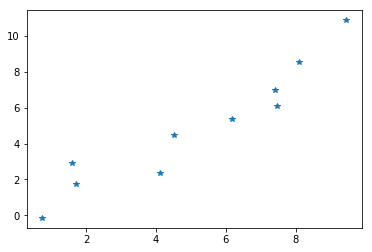

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_data,y_label,"*")

We are trying to solve 
$$y = mx+b$$

In [76]:
np.random.rand(2)

array([0.32320293, 0.51879062])

In [77]:
m = tf.Variable(0.32)
b = tf.Variable(0.52)

We now add a cost function for optimization.
We will use the square difference

In [78]:
error = 0
for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

We will use a Gradient DescentOptimizer to optimize the regression.

In [79]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [80]:
init = tf.global_variables_initializer()

In [81]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 1
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])

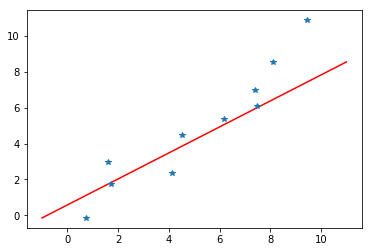

In [82]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,"*")

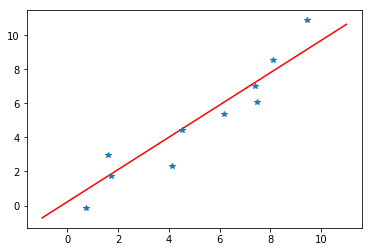

In [84]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,"*")